In [1]:
from tr import *
from PIL import Image, ImageDraw, ImageFont

1024 760


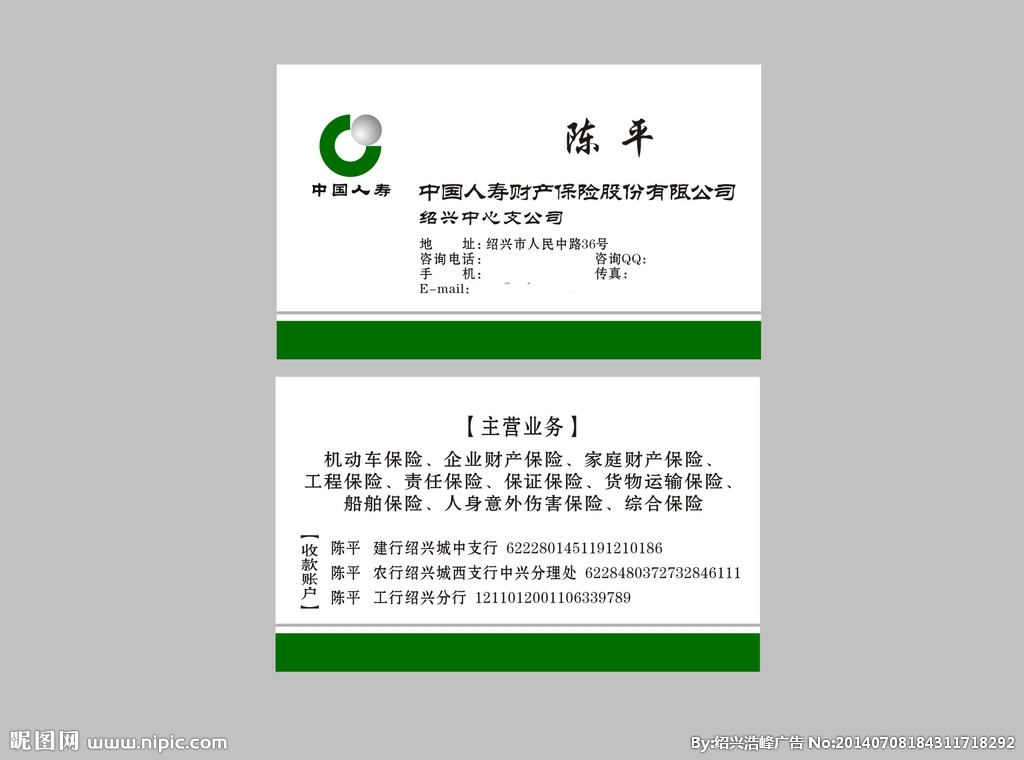

In [2]:
img_pil = Image.open("imgs/name_card.jpg")
MAX_SIZE = 2000
if img_pil.height > MAX_SIZE or img_pil.width > MAX_SIZE:
    scale = max(img_pil.height / MAX_SIZE, img_pil.width / MAX_SIZE)

    new_width = int(img_pil.width / scale + 0.5)
    new_height = int(img_pil.height / scale + 0.5)
    img_pil = img_pil.resize((new_width, new_height), Image.BICUBIC)

print(img_pil.width, img_pil.height)
img_pil

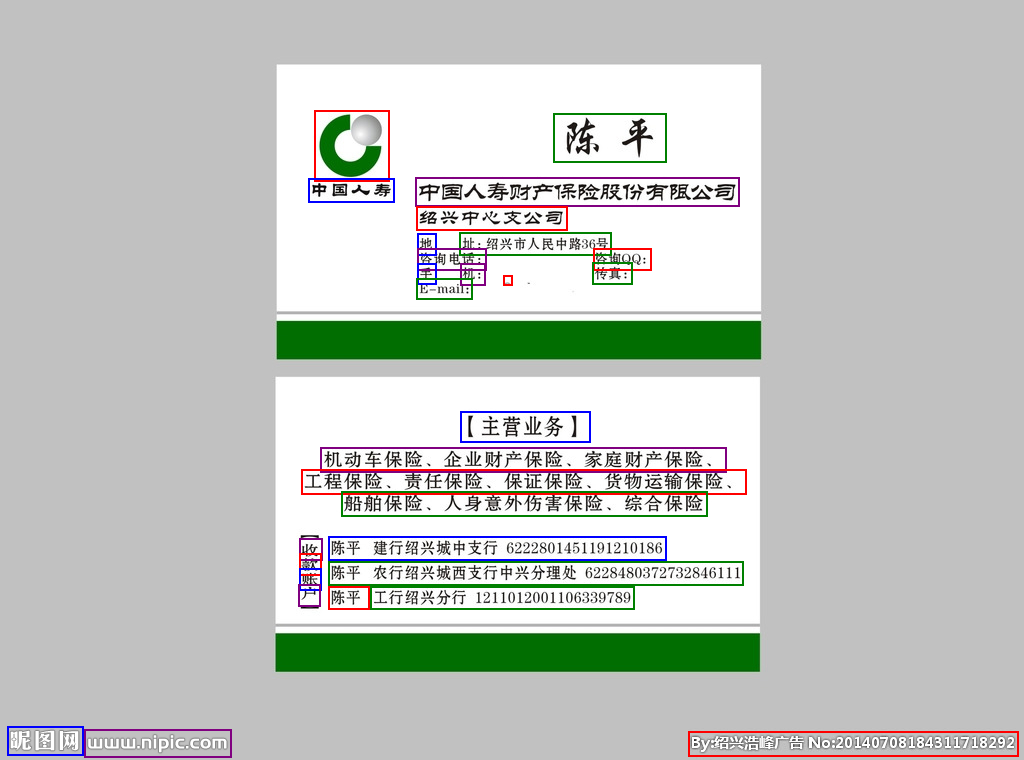

In [3]:
color_pil = img_pil.convert("RGB")
gray_pil = img_pil.convert("L")

rect_arr = detect(gray_pil, FLAG_RECT)

img_draw = ImageDraw.Draw(color_pil)
colors = ['red', 'green', 'blue', "purple"]

for i, rect in enumerate(rect_arr):
    x, y, w, h = rect
    img_draw.rectangle(
        (x, y, x + w, y + h),
        outline=colors[i % len(colors)],
        width=2)

color_pil

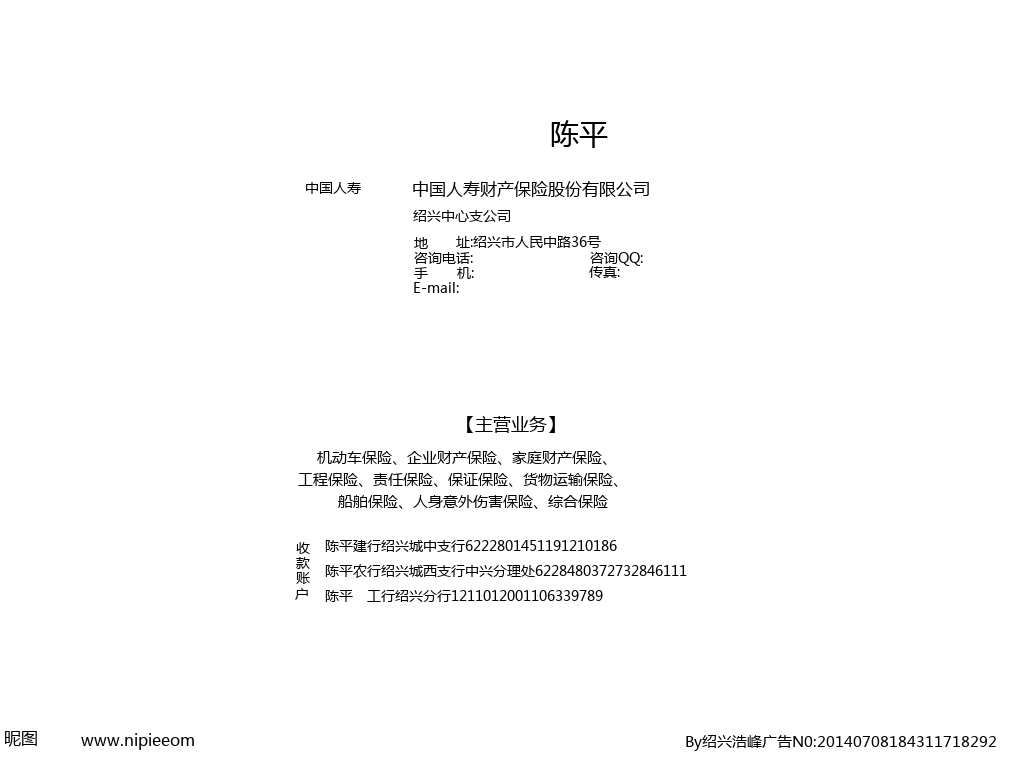

In [4]:
blank_pil = Image.new("L", img_pil.size, 255)
blank_draw = ImageDraw.Draw(blank_pil)

results = run(gray_pil)
for line in results:
    x, y, w, h = line[0]
    txt = line[1]
    font = ImageFont.truetype("msyh.ttf", max(int(h * 0.6), 14))
    blank_draw.text(xy=(x, y), text=txt, font=font)

blank_pil